# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load FBM B lineage

In [3]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20201007.h5ad')

In [4]:
adata.raw = adata

In [5]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T cell             327
CD8 T cell             171
CD14 monocyte         8763
CD56 bright NK         449
CMP                    425
                      ... 
schwann cells            9
sinusoidal EC          550
stromal macrophage    1464
tDC                    193
tip EC                 362
Length: 64, dtype: int64

In [6]:
lymphoid_celltypes = ['pre pro B progenitor', 'pro B progenitor', 'pre B progenitor', 'immature B cell', 
                     'naive B cell']

In [7]:
adata = adata[adata.obs['cell.labels'].isin(lymphoid_celltypes)].copy()

In [8]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
immature B cell          1988
naive B cell             1411
pre B progenitor        14229
pre pro B progenitor     5427
pro B progenitor         5528
dtype: int64

In [9]:
adata.shape

(28583, 33712)

# Pre-process the dataset

In [10]:
# normalise count data 
sc.pp.normalize_total(adata)

In [11]:
# log the count data 
sc.pp.log1p(adata)

In [12]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [13]:
# scale the data 
sc.pp.scale(adata, max_value=10)

In [14]:
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

# Run dotplot

In [15]:
genes = ['SPINK2',
'CD34',
'FLT3',
'IL7R',
'CDC45',
'DHFR',
'UHRF1',
'DNTT',
'VPREB1',
'RAG1',
'MME',
'IDH2',
'CD19', 
'SPIB',
'IGHM',
'IGHD',
'MS4A1',
'CD40',
'FCER2']

In [16]:
adata.obs["cell.labels"] = adata.obs["cell.labels"].cat.reorder_categories(['pre pro B progenitor', 
                     'pro B progenitor', 'pre B progenitor', 'immature B cell', 
                     'naive B cell'])

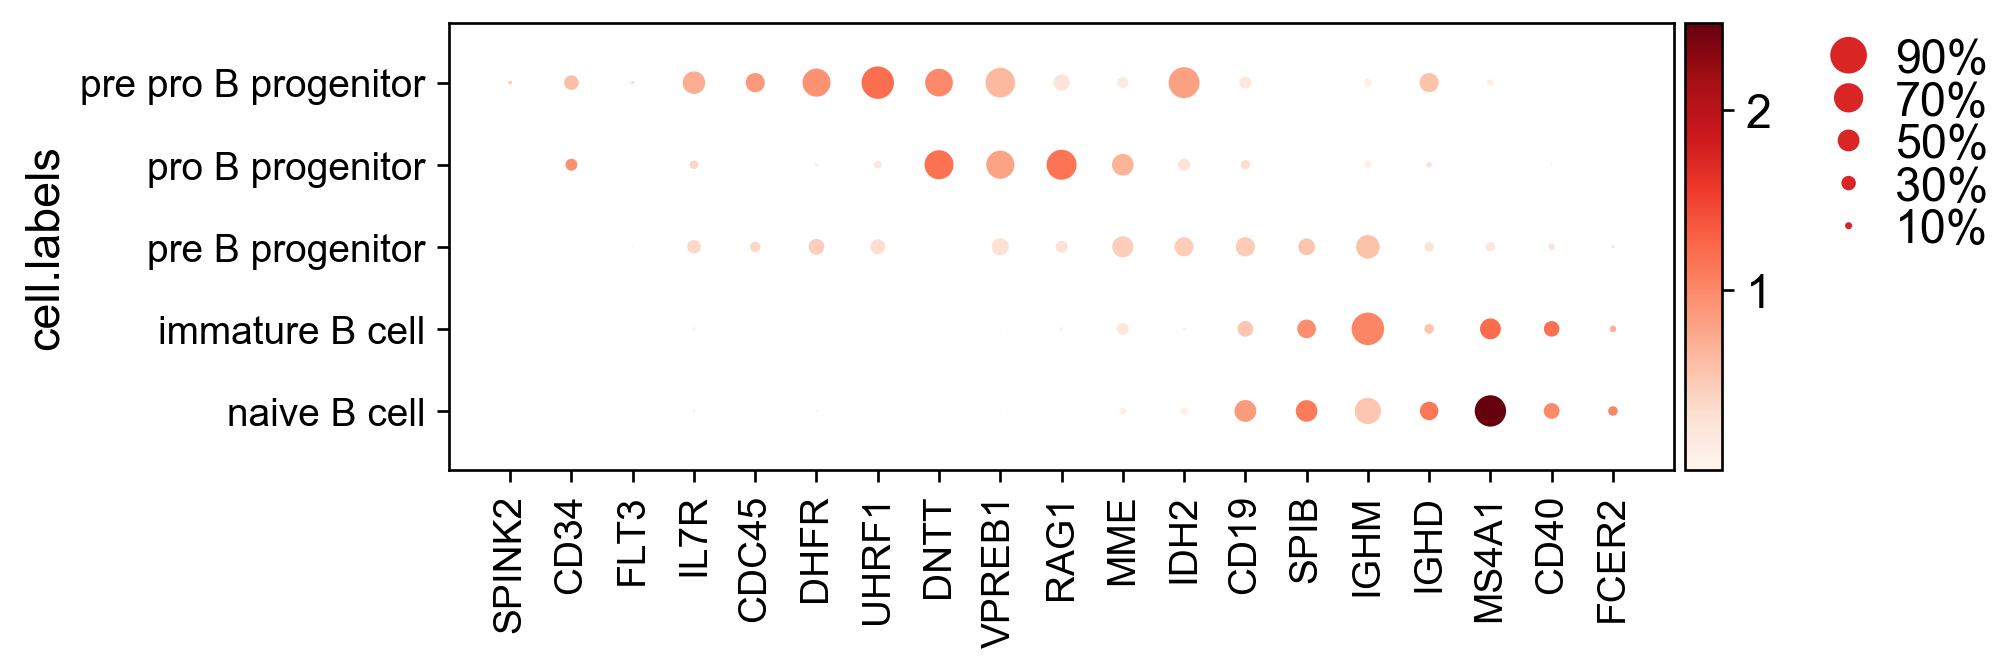

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[6.6499999999999995, 0, 0.2, 0.5, 0.25])

In [17]:
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.pl.dotplot(adata, var_names=genes, groupby="cell.labels", use_raw=False, save="figs3a_bcell_dotplot_20210115.pdf")

# Save the data

In [18]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [19]:
adata.X

<28583x33712 sparse matrix of type '<class 'numpy.float32'>'
	with 59802034 stored elements in Compressed Sparse Row format>

In [20]:
adata.raw.X

<28583x33712 sparse matrix of type '<class 'numpy.float32'>'
	with 66910083 stored elements in Compressed Sparse Row format>

In [21]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk2/data/figs3a_bcell_dotplot_20210115.h5ad")